In [1]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [11]:
train = data('iris')

In [12]:
train.columns = [col.lower().replace(' ', '_').replace('.', '_') for col in train.columns]


In [13]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


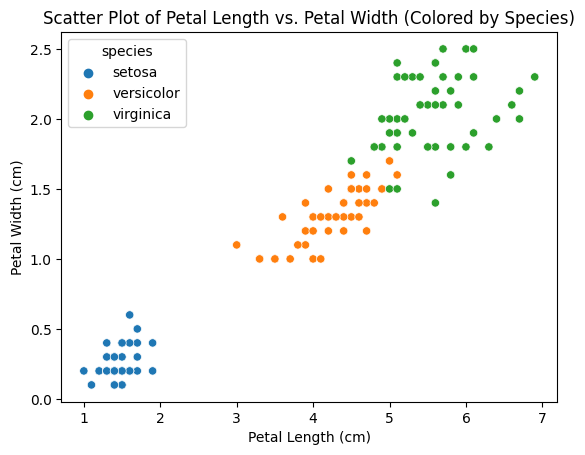

In [14]:
# Create a scatter plot using the 'train' DataFrame with 'species' as hue
sns.scatterplot(x='petal_length', y='petal_width', data=train, hue='species')

# Add labels and a title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width (Colored by Species)')

# Show the plot
plt.show()

In [15]:
def get_distances(list_a, list_b):
    difs = []
    for a_i, b_i in zip(list_a, list_b):
        difs.append((a_i - b_i) ** 2 )
    return sum(difs) ** .5

In [16]:
point_a = [0, 1, 3]
point_b = [6, 10, 30]

get_distances(point_a, point_b)

29.086079144497972

In [17]:
centroid = {
    0: [0,0],
    1: [0.5, 0.5],
    2: [0.8, 0.8]
}

In [18]:
scalers = MinMaxScaler()
train[['petal_length', 'petal_width']] = \
scalers.fit_transform(train[['petal_length', 'petal_width']])

In [ ]:
feats = ['petal_length', 'petal_width']

In [23]:
train[feats].head()

,petal_length,petal_width
1,0.067797,0.041667
2,0.067797,0.041667
3,0.050847,0.041667
4,0.084746,0.041667
5,0.067797,0.041667


In [25]:
centroid.keys()

dict_keys([0, 1, 2])

In [26]:
def assign_clusters():
    cluster_assigments = []
    for i , row in train[feats].iterrows():
        distances = []
        for n in centroid.keys():
            distances.append(get_distances(centroid[n], row.values))
        cluster = pd.Series(distances).idxmin()
        cluster_assigments.append(cluster)
    return cluster_assigments

In [42]:
train['cluster'] = assign_clusters()

In [43]:
train[feats][train['cluster'] == 0]

,petal_length,petal_width
1,0.067797,0.041667
2,0.067797,0.041667
3,0.050847,0.041667
4,0.084746,0.041667
5,0.067797,0.041667
6,0.118644,0.125000
7,0.067797,0.083333
8,0.084746,0.041667
9,0.067797,0.041667
10,0.084746,0.000000


In [44]:
train[['petal_length', 'petal_width', 'cluster']].groupby('cluster').mean().values[0]

array([0.07830508, 0.06083333])

In [54]:
for i in train.cluster.unique():
    centroid[i] = train[
        ['petal_length', 'petal_width', 'cluster']
    ].groupby('cluster').mean().values[i]
        

In [51]:
centroid

{0: array([0.07830508, 0.06083333]),
 1: array([0.55152542, 0.5075    ]),
 2: array([0.77254237, 0.80583333])}

In [52]:
feats_with_clusters = ['petal_length', 'petal_width', 'cluster']

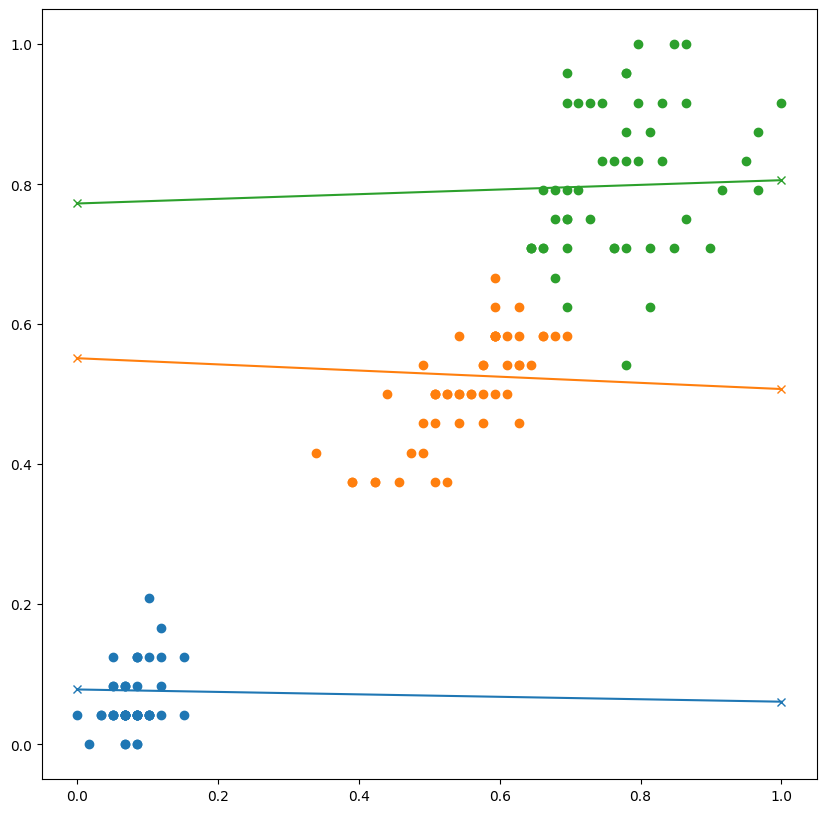

In [53]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for cluster, subset in train[feats_with_clusters].groupby('cluster'):
    ax.scatter(subset['petal_length'], subset['petal_width'])
    ax.plot(centroid[cluster], marker= 'x')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3, n_init='auto')

In [60]:
kmeans.fit(train[feats])

KMeans(n_clusters=3, n_init='auto')

In [62]:
train['sk_clusters'] = kmeans.predict(train[feats])

In [63]:
kmeans.inertia_

1.701874688192097